In [15]:
import pandas as pd

In [16]:
trainingDataIndep = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv')

print( trainingDataIndep.shape)

trainingDataDep = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv', 
                      usecols=['total_cases'])
print(trainingDataDep.shape)

testDataIndep = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv')

(1456, 24)
(1456, 1)


In [17]:
trainingDataIndep.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [18]:
trainingDataDep.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [19]:
testDataIndep.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [20]:
trainingData = pd.concat([trainingDataDep, trainingDataIndep], axis=1) 

In [21]:
trainingData.head()

,total_cases,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,4,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,5,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,4,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,6,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [22]:
trainingData_sj =  trainingData[trainingData['city'] == 'sj']

In [23]:
trainingData_iq =  trainingData[trainingData['city'] == 'iq']

In [24]:
## FrontFill for impute

In [25]:
trainingData_sj = trainingData_sj.fillna(method = 'ffill')
trainingData_iq = trainingData_iq.fillna(method = 'ffill')

In [26]:
trainingData_sj.set_index('week_start_date', drop = True, inplace = True)
trainingData_iq.set_index('week_start_date', drop = True, inplace = True)

In [27]:
trainingData_sj.drop(['city', 'year'], axis = 1, inplace = True)
trainingData_iq.drop(['city', 'year'], axis = 1, inplace = True)

In [29]:
trainingData_iq.to_pickle('trainingData_iq.pkl')
trainingData_sj.to_pickle('trainingData_sj.pkl')

In [30]:
train_new = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv', parse_dates=[3])
test_new = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv', parse_dates=[3])

In [31]:
totalSet = pd.concat([train_new, test_new], axis = 0)

In [32]:
total_sj = totalSet[totalSet['city'] == 'sj']
total_iq = totalSet[totalSet['city'] == 'iq']

In [33]:
total_sj = total_sj.fillna(method = 'ffill')
total_iq = total_iq.fillna(method = 'ffill')

In [35]:
total_sj.set_index('week_start_date', drop = True, inplace = True)
total_iq.set_index('week_start_date', drop = True, inplace = True)

In [36]:
total_sj.drop(['city', 'year'], axis = 1, inplace = True)
total_iq.drop(['city', 'year'], axis = 1, inplace = True)
total_iq.to_pickle('total_iq.pkl')
total_sj.to_pickle('total_sj.pkl')

In [37]:
##Basic Feature Preprocessing is done

In [38]:
total_data_sj = pd.read_pickle('total_sj.pkl')
total_data_iq = pd.read_pickle('total_iq.pkl')

total_cases_pick = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv')
cases_sj = total_cases_pick[total_cases_pick['city'] == 'sj']['total_cases']
cases_iq = total_cases_pick[total_cases_pick['city'] == 'iq']['total_cases']

# create month variable
total_data_sj['month'] = total_data_sj.index.month
total_data_iq['month'] = total_data_iq.index.month

# mean ndvi
total_data_sj['ndvi_mean'] = (total_data_sj['ndvi_ne'] + total_data_sj['ndvi_nw'] + total_data_sj['ndvi_se'] + total_data_sj['ndvi_sw']) / 4.0
total_data_iq['ndvi_mean'] = (total_data_iq['ndvi_ne'] + total_data_iq['ndvi_nw'] + total_data_iq['ndvi_se'] + total_data_iq['ndvi_sw']) / 4.0

In [40]:

sj_valid_split = '2003-4-20'
sj_test_split = '2008-4-27' # pre post submissions

sj_train = total_data_sj.loc[:sj_valid_split]
sj_Xtrain = sj_train
sj_ytrain = cases_sj[:len(sj_train)]

sj_valid = total_data_sj.loc[sj_valid_split : sj_test_split]
sj_Xvalid = sj_valid
sj_yvalid = cases_sj[len(sj_train):]

sj_test = total_data_sj.loc[sj_test_split:]
sj_Xtest = sj_test

In [41]:
iq_valid_split = '2007-7-01'
iq_test_split = '2010-7-01' # pre and post submission dates

# split
iq_train = total_data_iq.loc[:iq_valid_split]
iq_Xtrain = iq_train
iq_ytrain = cases_iq[:len(iq_Xtrain)]

iq_valid = total_data_iq.loc[iq_valid_split : iq_test_split]
iq_Xvalid = iq_valid
iq_yvalid = cases_iq[len(iq_train):]

iq_test = total_data_iq.loc[iq_test_split:]
iq_Xtest = iq_test

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

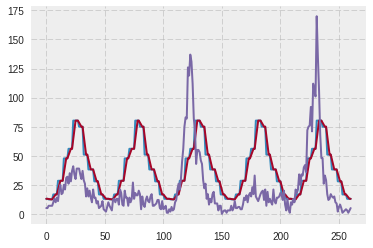

In [43]:

lr_sj = LinearRegression()
X = pd.get_dummies(sj_Xtrain['month'], prefix='month')
y = sj_ytrain.values

lr_sj.fit(X, y)
monthly_trend_train = pd.Series(lr_sj.predict(X)).rolling(3, min_periods = 1).mean()
sj_residuals_train = y - monthly_trend_train

Xtest = pd.get_dummies(sj_Xvalid['month'], prefix='month')
ytest = sj_yvalid.values
monthly_trend_valid = pd.Series(lr_sj.predict(Xtest)).rolling(3, min_periods=1).mean()
sj_residuals_test = ytest - monthly_trend_valid

# plot
plt.plot(lr_sj.predict(Xtest))
plt.plot(monthly_trend_valid)
plt.plot(ytest)
plt.show()

In [44]:
Xtrain_means1 = total_data_sj['station_avg_temp_c'].rolling(window = 52).mean()[60:675]
Xtrain_means2 = total_data_sj['ndvi_se'].rolling(window = 10).mean()[60:675]
Xtrain = pd.concat([Xtrain_means1], axis = 1)
ytrain = sj_residuals_train[60:]
Xvalid_means1 = total_data_sj['station_avg_temp_c'].rolling(window = 53).mean()[675:936]
Xvalid_means2 = total_data_sj['ndvi_se'].rolling(window = 10).mean()[675:936]
Xvalid = pd.concat([Xvalid_means1], axis = 1)[60:]
yvalid = sj_residuals_test[60:]


# fit on model, predict
lr_sj_residual = LinearRegression()
lr_sj_residual.fit(Xtrain, ytrain)

sj_valid_preds = lr_sj_residual.predict(Xvalid)


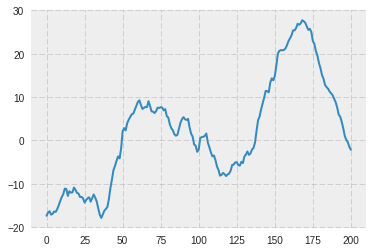

In [46]:
plt.plot(sj_valid_preds)

In [47]:
lr_iq = LinearRegression()
X = pd.get_dummies(iq_Xtrain['month'], prefix='month')
y = iq_ytrain.values

lr_iq.fit(X, y)
monthly_trend_train = pd.Series(lr_iq.predict(X)).rolling(9, min_periods = 1).mean()
iq_residuals_train = y - monthly_trend_train
Xtest = pd.get_dummies(iq_Xvalid['month'], prefix='month')
ytest = iq_yvalid.values
monthly_trend_valid = pd.Series(lr_iq.predict(Xtest)).rolling(9, min_periods=1).mean()
iq_residuals_test = ytest - monthly_trend_valid

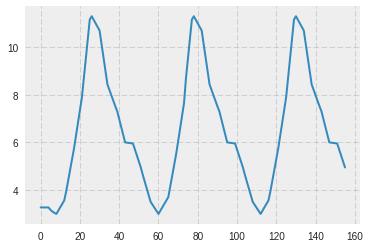

In [48]:
plt.plot(monthly_trend_valid)

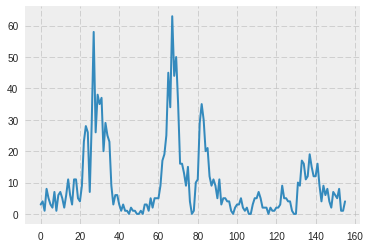

In [49]:
plt.plot(ytest)

In [50]:
Xtrain_means1 = total_data_iq['station_avg_temp_c'].rolling(window = 53).mean()[60:364]
Xtrain = pd.concat([Xtrain_means1], axis = 1)
ytrain = iq_residuals_train[60:]
Xvalid_means1 = total_data_iq['station_avg_temp_c'].rolling(window = 53).mean()[364:520]
Xvalid = pd.concat([Xvalid_means1], axis = 1)[60:]
yvalid = iq_residuals_test[60:]
lr_iq_resids = LinearRegression()
lr_iq_resids.fit(Xtrain, ytrain)
iq_valid_preds = lr_iq_resids.predict(Xvalid)

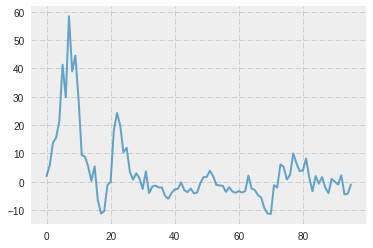

In [51]:
plt.plot(yvalid.values, alpha = .75)

In [52]:
month_temp = pd.get_dummies(total_data_sj['month'], prefix='month')
temp_means_roll = pd.DataFrame(total_data_sj[['station_avg_temp_c']].rolling(window = 55).mean())
Xtest = pd.concat([month_temp, temp_means_roll], axis = 1)
# train model
lr_sj_full = LinearRegression()
lr_sj_full.fit(Xtest[60:-260], cases_sj.values[60:])

# predicts
sj_full_preds = lr_sj_full.predict(Xtest[55:])
sj_submit_preds = sj_full_preds[-260:]

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
print (mean_absolute_error(sj_full_preds[:-260], cases_sj.values[55:]))

25.7641174801


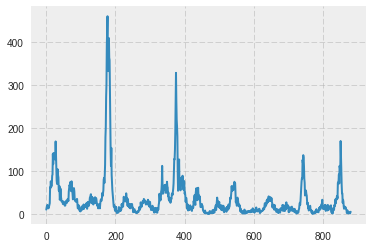

In [56]:
plt.plot(cases_sj.values[55:])

In [57]:
month_temp_iq = pd.get_dummies(total_data_iq['month'], prefix='month')
temp_means_roll_iq = pd.DataFrame(total_data_iq[['ndvi_nw']].rolling(window = 68).mean())
Xtest = pd.concat([month_temp_iq, temp_means_roll_iq], axis = 1)

# train
lr_iq_full = LinearRegression()
lr_iq_full.fit(Xtest[68:-156], cases_iq.values[68:])

# predicts
iq_full_preds = lr_iq_full.predict(Xtest[68:])
iq_submit_preds = iq_full_preds[-156:]

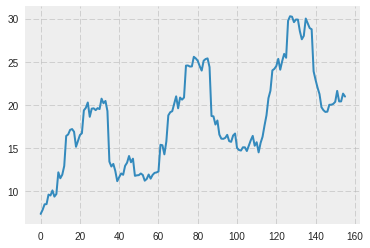

In [58]:
plt.plot(iq_submit_preds)

In [59]:
total_preds = list(sj_submit_preds) + list(iq_submit_preds)

In [60]:
print (total_preds)

[9.21875, 6.578125, 7.59375, 9.375, 9.65625, 11.25, 9.9375, 10.234375, 9.703125, 20.734375, 19.484375, 19.015625, 18.859375, 18.96875, 39.265625, 39.875, 40.21875, 40.453125, 49.578125, 49.5, 49.359375, 48.46875, 47.96875, 63.125, 62.203125, 61.265625, 60.796875, 51.5625, 51.015625, 51.609375, 50.6875, 32.296875, 31.0, 31.796875, 31.046875, 22.421875, 22.421875, 23.234375, 23.71875, 24.890625, 16.40625, 17.203125, 17.640625, 18.59375, 11.84375, 12.421875, 12.671875, 12.8125, 5.796875, 6.3125, 7.796875, 8.328125, 10.0, 9.875, 9.4375, 9.171875, 10.65625, 13.0625, 12.828125, 13.25, 13.890625, 27.296875, 27.65625, 28.328125, 29.171875, 30.78125, 51.78125, 51.90625, 51.84375, 52.921875, 61.40625, 61.09375, 61.421875, 60.734375, 76.953125, 78.40625, 80.46875, 81.078125, 81.96875, 75.203125, 75.578125, 75.65625, 75.34375, 57.984375, 58.28125, 58.484375, 59.90625, 53.078125, 53.25, 53.78125, 53.796875, 54.484375, 43.96875, 44.359375, 44.5625, 45.703125, 40.1875, 41.03125, 41.984375, 44.21875, 

In [62]:
submission_format = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/submission_format.csv')

In [63]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [64]:
submission_format['total_cases'] = total_preds
submission_format['total_cases'] = submission_format['total_cases'].apply(lambda x: int(x))

In [65]:
submission_format['total_cases'].head()

0    9
1    6
2    7
3    9
4    9
Name: total_cases, dtype: int64

In [ ]:
submission_format.to_csv('submission.csv', index=False)